In [73]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [74]:
datasets = ['EURUSD=X']
for dataset in datasets:
    Ticker = yf.Ticker(dataset)
    data = Ticker.history(start='2023-09-01', end='2023-10-16')
    filename=f'{dataset}_data.csv'
    data.to_csv(filename)
    print(f'Download data for {dataset} and Saved as {filename}')

Download data for EURUSD=X and Saved as EURUSD=X_data.csv


In [75]:
Ticker = 'EURUSD=X'
start_date = '2023-09-01'
end_date = '2023-10-16'
data = yf.download(Ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [76]:
data_0 =data[['Adj Close']]

In [77]:
for i in range(1, 6):
    data_0[f'Adj Close Lag {i}'] = data_0['Adj Close'].shift(i)

<ipython-input-77-f3049c8a8af3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0[f'Adj Close Lag {i}'] = data_0['Adj Close'].shift(i)
<ipython-input-77-f3049c8a8af3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0[f'Adj Close Lag {i}'] = data_0['Adj Close'].shift(i)
<ipython-input-77-f3049c8a8af3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [78]:
data_0= data.dropna()

In [79]:
X =data_0.drop('Adj Close', axis=1)
y = data_0['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [81]:
y_pred = model.predict(X_test)


In [82]:
y_pred

array([1.06582022, 1.06582022, 1.06582022, 1.06582022, 1.06582022,
       1.06582022, 1.06582022])

In [83]:
mse = mean_squared_error(y_test, y_pred)

In [84]:
mse

0.00010137227931344179

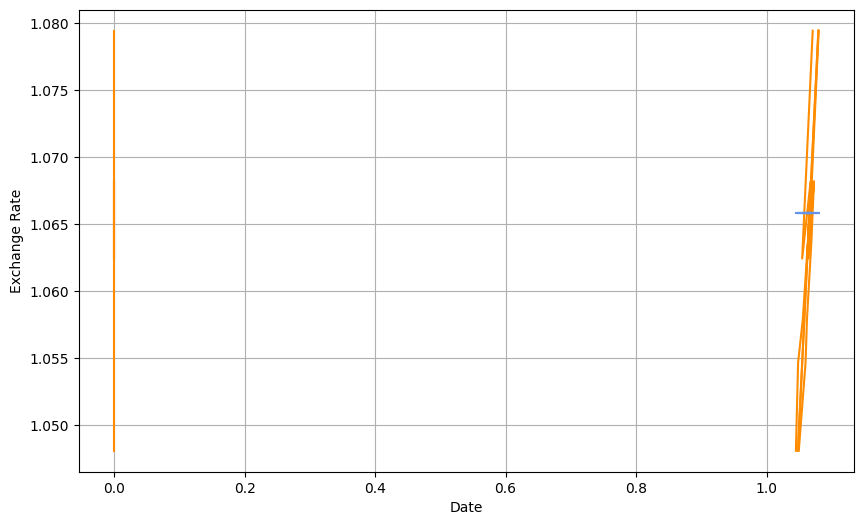

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, label='True Exchange Rate', color='darkorange')
plt.plot(X_test, y_pred, label='Predicted Exchange Rate', color='cornflowerblue')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()